# **Project Name**    - EDA Hotel Bookings Capstone Project



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** - Humayel
##### **Team Member 2 -** - Divyanshu Chauhan
##### **Team Member 3 -** - Shubham


# **Project Summary -**

* The Hotel Booking Analysis project is an in-depth exploratory data analysis (EDA) project focused on analyzing hotel booking data to extract valuable insights and make data-driven observations. The project addresses various aspects of hotel bookings, including cancellations, booking ratios between resort and city hotels, percentage of bookings per year, monthly customer counts, guest origins, average monthly rates per person, weekday versus weekend bookings, hotel availability, total bookings and revenue across years, preferred hotels and stay durations, and length of stay.

* The project begins by cleaning and preprocessing the dataset to ensure data quality. Through data exploration and visualization, we determine the number of bookings that were cancelled and examine the factors contributing to cancellations. Next, we calculate the booking ratio between resort hotels and city hotels to understand customer preferences and identify any significant differences in booking patterns. We also analyze the percentage of bookings for each year to identify booking trends and seasonality.

* Furthermore, we investigate the monthly customer counts received by each hotel to identify peak periods and seasonal variations in customer traffic. By determining the country from which most guests come, we gain insights into customer demographics and tailor marketing strategies accordingly. The average monthly rate per person is calculated to understand pricing trends and assess the competitiveness of hotels in the market.

* Additionally, we analyze the number of bookings made on weekdays versus weekends to identify any significant differences in customer behavior and booking patterns. We also assess hotel availability for booking and provide insights to hotel managers to optimize inventory management and improve booking efficiency.

* Moreover, the project explores the total number of bookings across different years, analyzing booking growth and trends. We split the total revenue across years by hotel type to evaluate revenue trends and compare the performance of different hotel types.

* Lastly, we investigate the preferred hotels where guests like to stay and spend more time. By differentiating between weeknight and weekend stays, we gain insights into customer preferences and behavior. Additionally, we analyze the length of stay in hotels to understand typical stay durations and any correlations with factors such as hotel type or booking month.

Through comprehensive data analysis, visualization, and interpretation, this project provides valuable insights into hotel booking patterns, customer behavior, revenue trends, and guest preferences. The findings can guide strategic decision-making, marketing efforts, and overall business optimization for hotel establishments.

# **GitHub Link -**

https://github.com/humayel1/Hotel-Booking-Analysis/blob/main/README.md

# **Problem Statement**


Hotel industry is a very volatile industry and the bookings depend on variety of factors such as type of hotels, seasonality, days of week and many more. This makes analyzing the patterns available in the past data more important to help the hotels plan better. Using the historical data, hotels can perform various campaigns to boost the business. We can use the patterns to predict the future bookings using time series or decision trees.

We will be using the data available to analyze the factors affecting the hotel bookings. These factors can be used for reporting the trends and predict the future bookings.

We will be tackling this problem statement
1. How Many Booking Were Cancelled?
2. What is the booking ratio between Resort Hotel and City Hotel?
3. What is the percentage of booking for each year?
4. What is the monthly customers each hotel is receiving?
5. From which country most guests come?
6. What is the average monthly rate per person?
7. Number of bookings on weekday vs weekends.
8. Hotels available for booking.
9. Total bookings across years.
10. Total revenue across years split by hotel type.
11. Check in which hotel people like to stay and spend more time.
(a). We will check for the week nights stay.
(b). We will check for the weekends stay.
12. How Long People Stay in the hotel?

#### **Define Your Business Objective?**

*Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.*

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install missingno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.ticker as mtick

Main Libraries to be used:
* Pandas for data manipulation, aggregation
* Matplotlib and Seaborn for visualisation and behaviour with respect to the
target variable.
* NumPy for computationally efficient operations
* missingno generates a matrix visualization where each column represents a variable in the dataset, and each row represents an entry. The missing values are represented by white lines in the matrix.

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Hotel Bookings.csv"
hotel_data = pd.read_csv(filepath)


### Dataset First View

In [ ]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [ ]:

row_count = len(hotel_data)
column_count = len(hotel_data.columns)
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 119390
Number of columns: 32


OR

In [ ]:
hotel_data.shape

(119390, 32)

### Dataset Information

In [ ]:
hotel_data.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

#### Duplicate Values

In [ ]:
duplicate_count = hotel_data.duplicated().sum()

print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 31994


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = hotel_data.isnull().sum().sort_values(ascending=False)

print("Missing values count:")
print(missing_values_count)

Missing values count:
company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                             

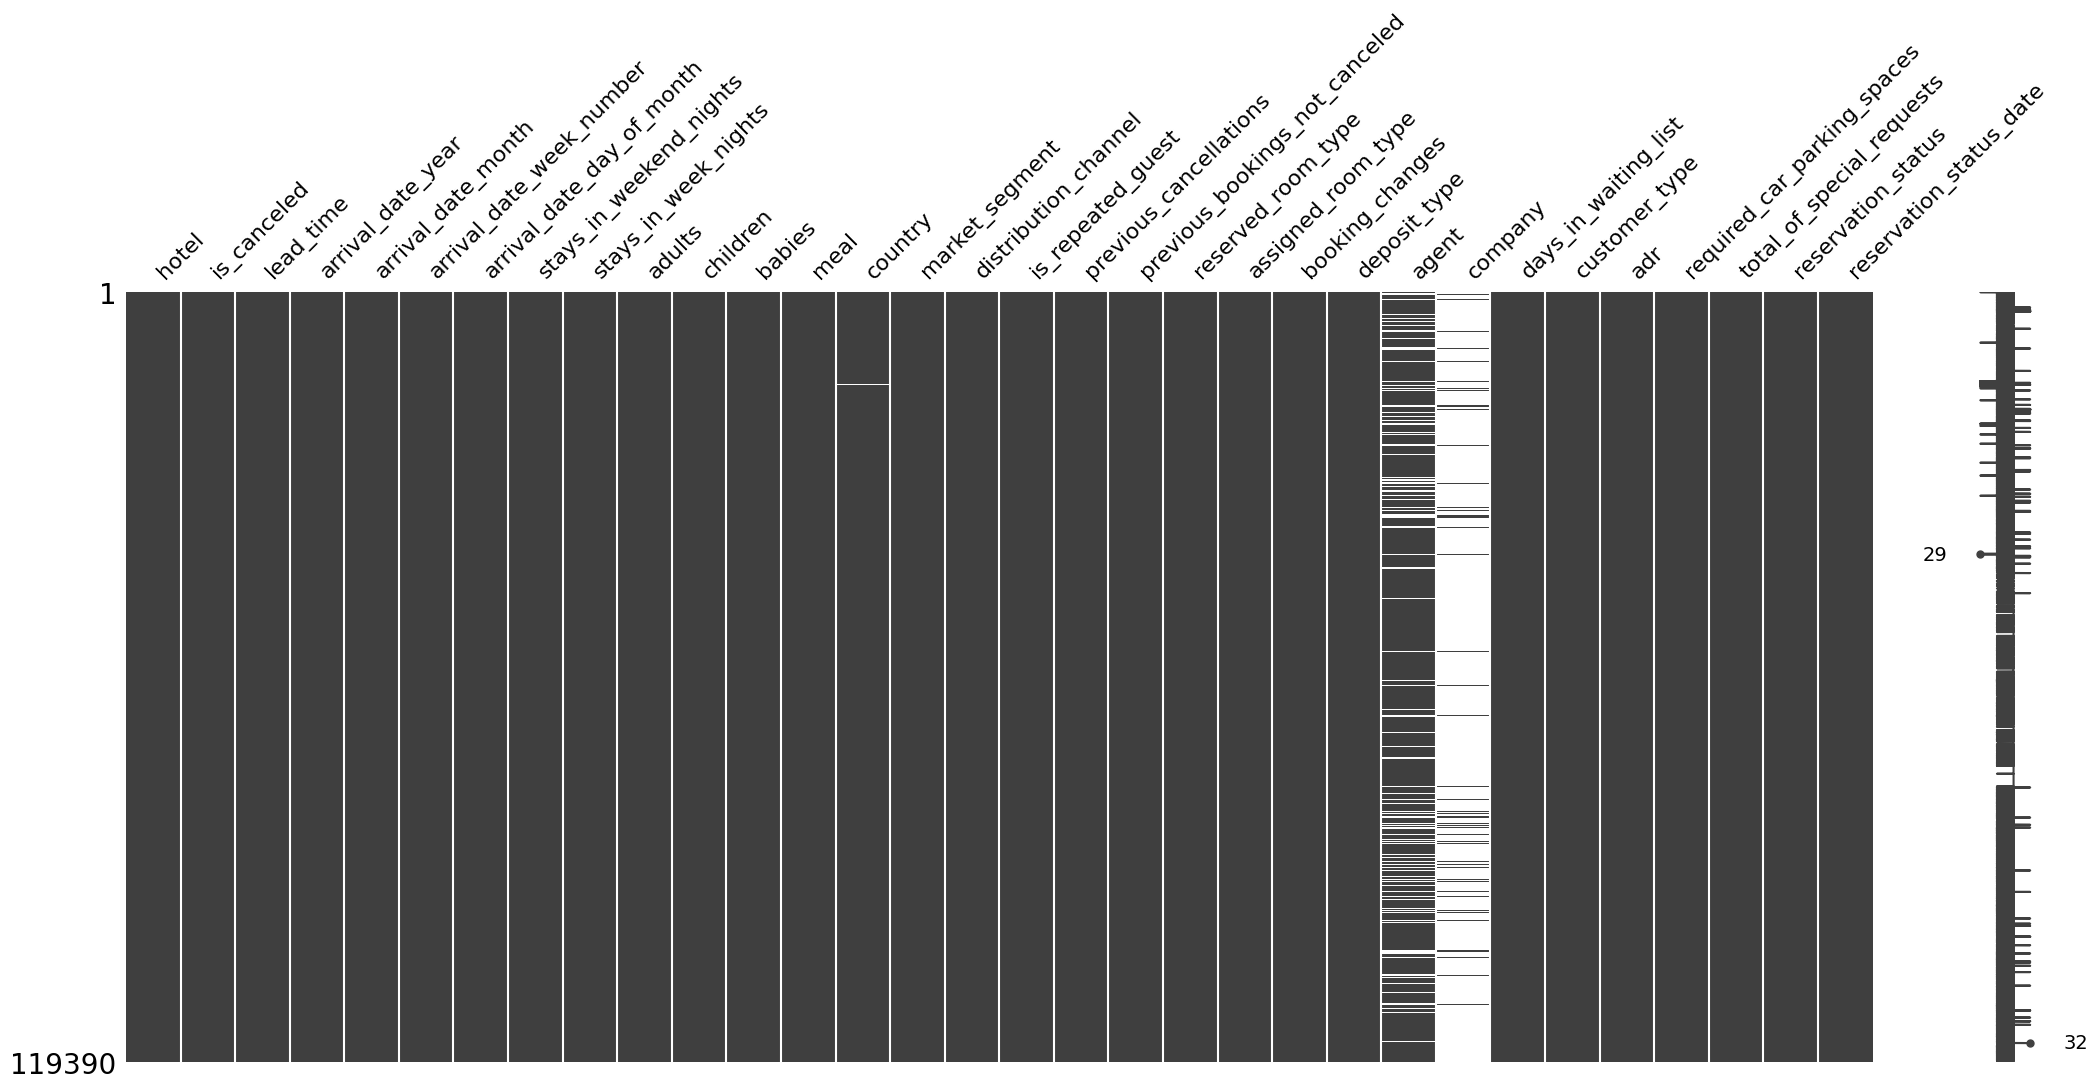

In [ ]:
# Visualizing the missing values
msno.matrix(hotel_data)
plt.show()

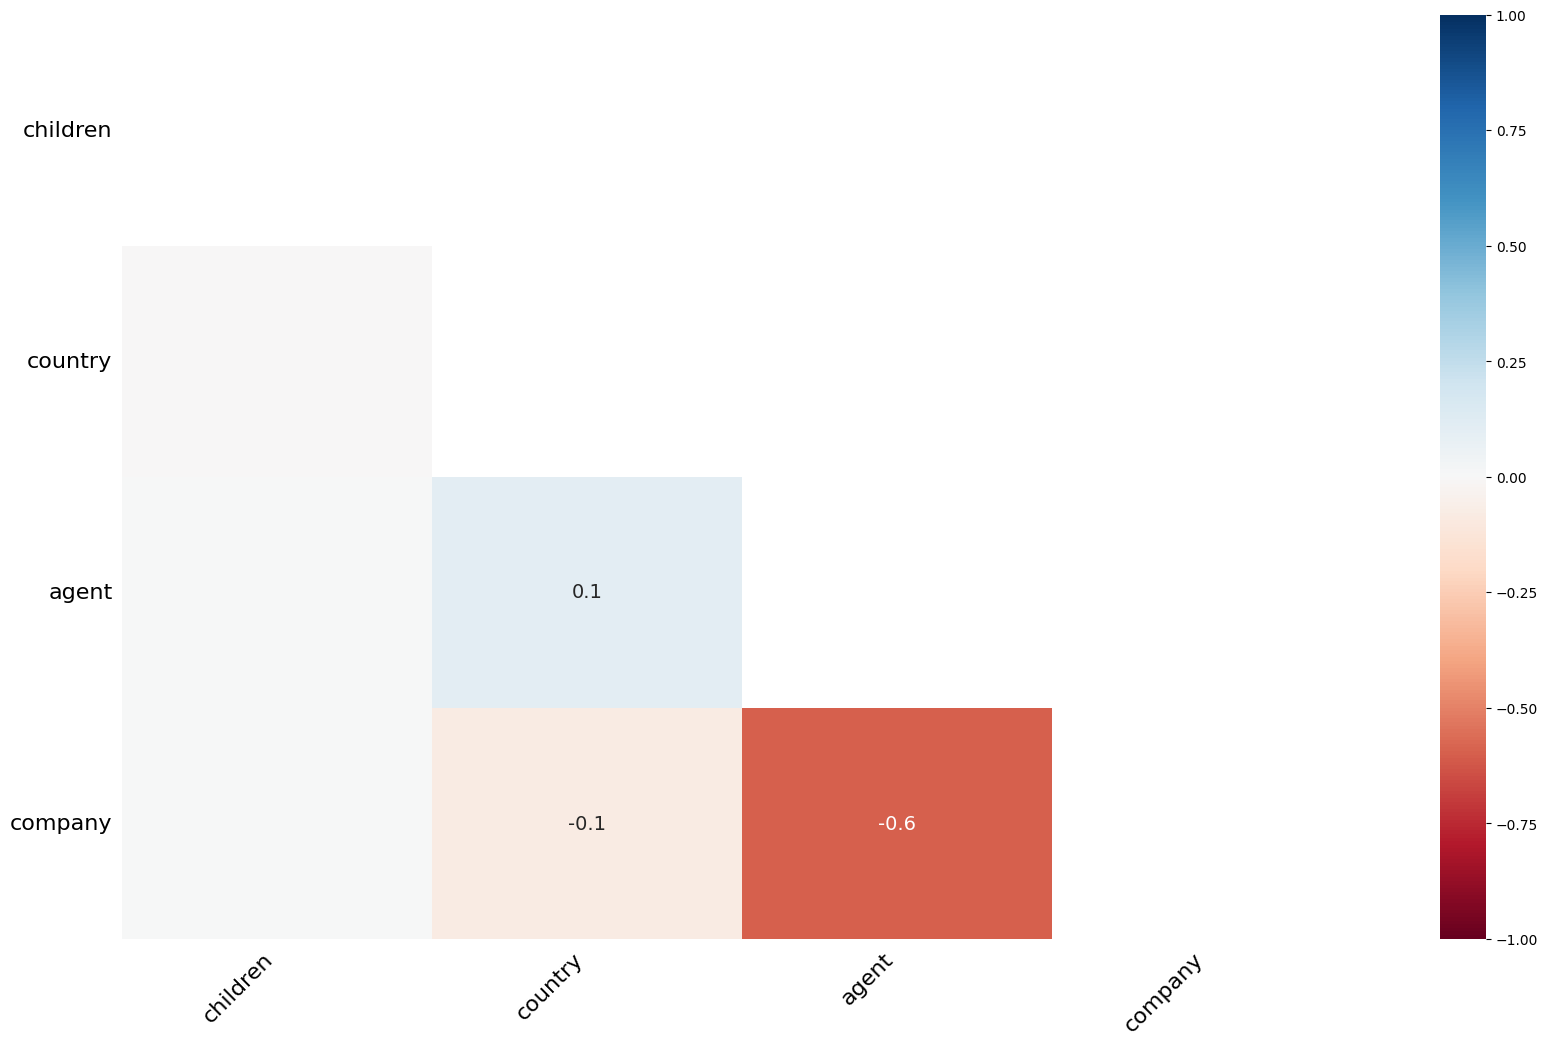

In [ ]:
msno.heatmap(hotel_data)
plt.show()

In [ ]:
print(round(100*(hotel_data.isnull().sum()/len(hotel_data.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [ ]:
hotel=hotel_data.drop(['agent','company'],axis=1)

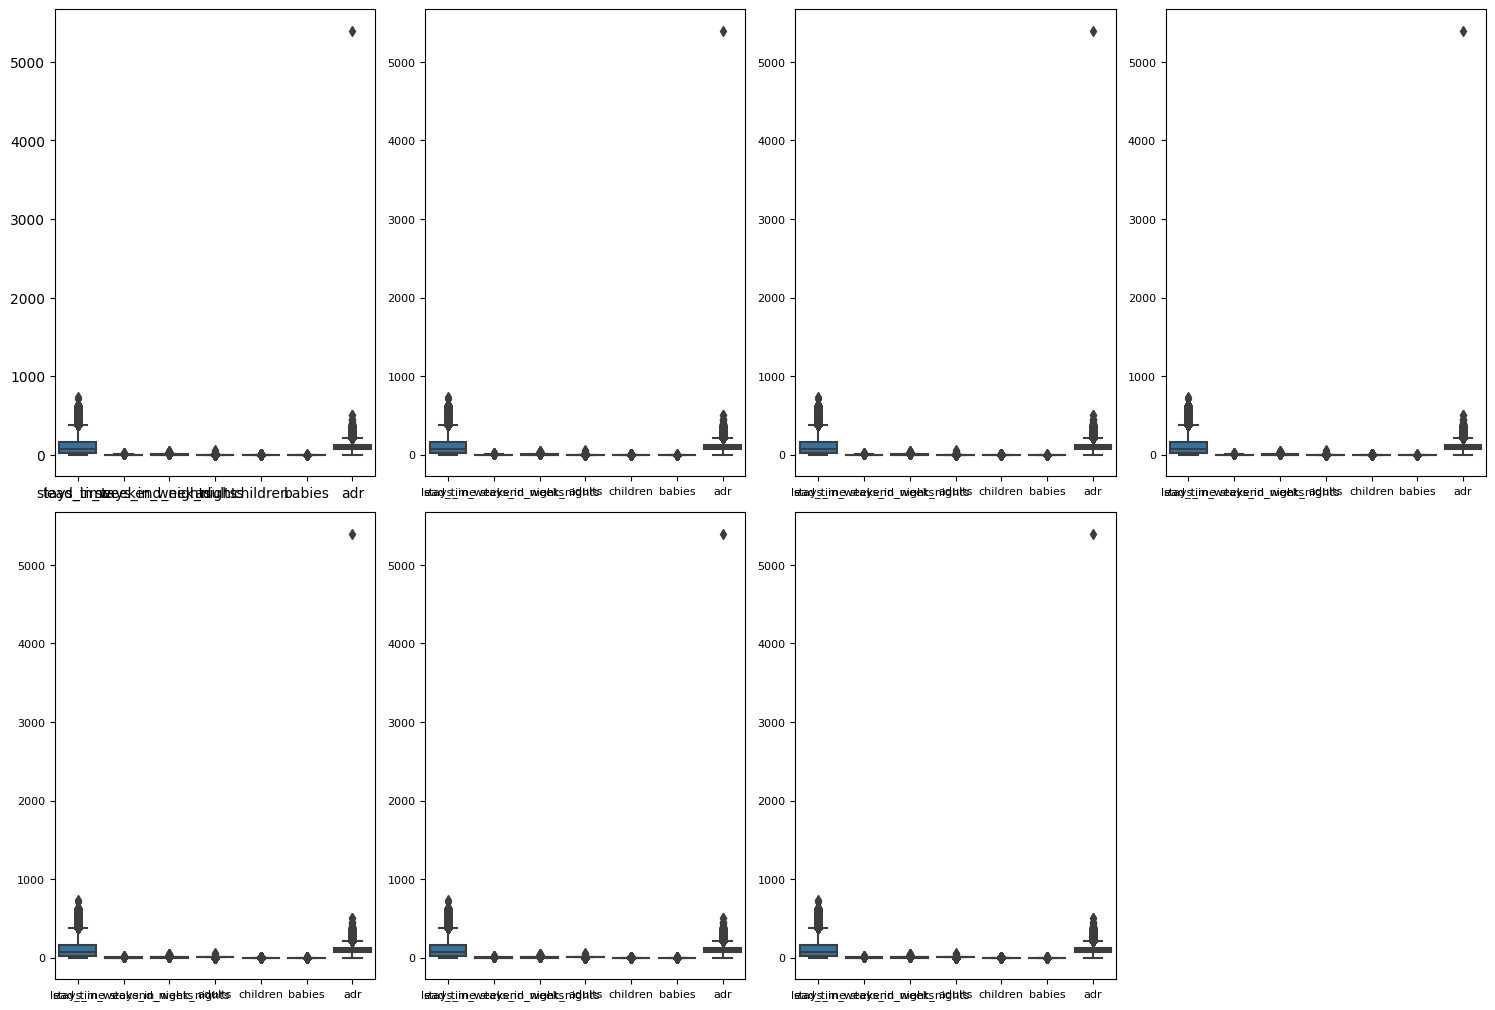

In [ ]:
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies','adr']
n = 1
plt.figure(figsize=(15,20))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel[features])
    plt.rcParams['font.size'] = 8
    n+=1
    plt.tight_layout()


### What did you know about your dataset?

*  is_cancelled:
If the booking was cancelled(l ) or
not(O)
* Hotel: H1 = Resort Hotel
H2=City Hotel
* lead_time:
Number of days that elapsed between
the entering date of the booking into the
PMS and the arrival date
* arrival-date-year:
Year of arrival date
* arrival_date_month: Month of arrival date
* arrival_date_week_number: Week number for arrival date
* arrival-dat-day: Day of arrival date
* stays_in_weekend_nights:
Number of weekend nights (Saturday or
Sunday) the guest stayed or booked to
stay at the hotel
* stays-in_week_nights:
Number of week nights (Monday to
Friday) the guest stayed or booked to
stay at the hotel
* adults:
Number of adults
* children:
Number of children
* babies:
Number of babies
* meal:
Kind of meal opted for
* country:
Country code
* market-segment:
Which segment the customer belongs
to
* Distribution _channel:
How the customer accessed the stay-
corporate booking/Direct/TA.TO
* is_repeated_guest:
Guest coming for first time or not
* previous_cancellation:
Was there a cancellation before
* previous-bookings:
Count of previous bookings
* reserved_room_type:
Type of room reserved
* assigned-room-type:
Type of room assigned
* booking-changes:
Count of changes made to booking
* deposit_type:
Deposit type
* agent:
Booked through agent
* days-in_waiting-list:
Number of days in waiting list
* customer_type:
Type of customer
* required-car-parking:
If car parking is required
* total_of_special-req:
Number of additional special
requirements
* reservation—status:
Reservation of status
* reservation_status_date:
Date of the specific status
*  The total number of rows in data is 119390. The dataset has 32 columns.
*  Based on the column definitions in data dictionary there are few candidates that might have datatype mismatch. Columns is_canceled and is_repeated_guest.
*  The unique values in hotel column are 0, 1
*  The unique values in is_repeated_guest column are 0, 1
*  The only column which has missing values is children. We can impute these values by 0.
*  Post imputing, the number of missing values in entire dataset are 0
*  There are 2 type of hotels. City Hotel has 79330 number of records and Resort Hotel has 40060 number of records.


In [ ]:
#Let us check the unique values for these columns:

is_canceled_unique = hotel_data["is_canceled"].unique()
print(f"the unique values in is_canceled are:{is_canceled_unique}")
is_repeated_guest_unique = hotel_data["is_repeated_guest"].unique()
print(f"the unique values in is_repeated_guest:{is_repeated_guest_unique}")

the unique values in is_canceled are:[0 1]
the unique values in is_repeated_guest:[0 1]


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
hotel_data.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
hotel_data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# copying the data set
df=hotel_data.copy()

In [ ]:
# In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.
df[["agent","company"]]=df[["agent","company"]].fillna(0.0)

In [ ]:
# Children column contains the count of children, so we will replace all the missing values with the rounded mean value.And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.
df['country'].fillna(hotel_data.country.mode().to_string(), inplace=True)
df['children'].fillna(round(hotel_data.children.mean()), inplace=True)

In [ ]:
# There are many rows that have zero guests including adults, children and babies. These type of rows does not make.
df[(df.adults+df.babies+df.children)==0].shape

In [ ]:
# We have 180 such rows. we will just remove these rows
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [ ]:
# checking the data type
df.dtypes

In [ ]:
# There are some columns like children, company, and agent, that are float type but their values are only in integers.So we will convert them to the integer type.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
# Let us check the unique values for these columns:

is_canceled_unique = hotel_data["is_canceled"].unique()
print(f"the unique values in is_canceled are:{is_canceled_unique}")
is_repeated_guest_unique = hotel_data["is_repeated_guest"].unique()
print(f"the unique values in is_repeated_guest:{is_repeated_guest_unique}")

In [ ]:
# We are selecting only those bookings which did not get canceled
df_not_canceled = df[df['is_canceled'] == 0]
df_not_canceled

In [ ]:
# Let's look at the number of countries from which the total bookings are made.
country=df_not_canceled.country.nunique()
country

In [ ]:
# This shows there is the total countries from where the bookings are made to these 2 hotels. We can identify the countries with the highest number of bookings.
top_countries_with_codes = df_not_canceled.country.value_counts().head(10)
top_countries_with_codes

In [ ]:
# df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

# # Group the data by hotel and calculate the total revenue
# revenue_by_hotel = df_not_canceled.groupby('hotel')['revenue'].sum()
# # Create a list of hotels and their revenue values
# hotels = revenue_by_hotel.index
# revenue_values = revenue_by_hotel.values

### What all manipulations have you done and insights you found?

Several manipulations have been performed on the dataset to make it analysis-ready. Here is a summary of the manipulations and insights found:

* **Data Cleaning**: The dataset was checked for missing values, duplicates, and inconsistent data. Missing values were handled through imputation or removal, duplicates were dropped, and data inconsistencies were resolved.

* **Feature Engineering**: New features were created to derive meaningful insights from the existing data. For example, the 'revenue' feature was calculated by multiplying the average daily rate (ADR) with the number of nights stayed.

* **Data Aggregation**: The data was aggregated using various grouping operations to summarize information at different levels. For example, the total revenue was calculated by grouping the data by year and hotel type.

* **Visualization**: Various visualizations were created to understand the patterns and trends in the data. Insights were derived from these visualizations, such as the booking cancellation rate, the booking ratio between resort and city hotels, the distribution of bookings on weekdays vs. weekends, the revenue trends across years, the country with the highest number of guests, and the average length of stay in hotels.

*  **Insights**: The insights gained from the data wrangling and visualization process can be summarized as follows:

* * **Booking** Cancellation: The dataset revealed the number of bookings that were canceled, providing insights into the cancellation rate and potential areas for improvement in the booking process.

* * **Hotel Type Comparison**: The booking ratio between resort and city hotels provided an understanding of the preference of guests and the popularity of each hotel type.

* * **Weekday vs. Weekend Bookings**: Analyzing the distribution of bookings on weekdays and weekends helped identify booking patterns and optimize hotel operations accordingly.

* * **Revenue Trends**: The visualization of total revenue across years highlighted revenue growth or decline over time, allowing for strategic decision-making and resource allocation.

Country of Origin: Identifying the country from which most guests come provided insights into the hotel's customer base and the potential for targeted marketing efforts.

* * **Length of Stay**: Understanding how long people stay in hotels helped optimize staff scheduling, room availability, and revenue forecasting.

These manipulations and insights have enhanced the understanding of the dataset and provided valuable information for our project.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-32-cb4d80a55270>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['adr_pp'] = df_not_canceled['adr'] / (df_not_canceled['adults'] + df_not_canceled['children'])
<ipython-input-32-cb4d80a55270>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['price'] = df_not_canceled['adr'] * (df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights'])


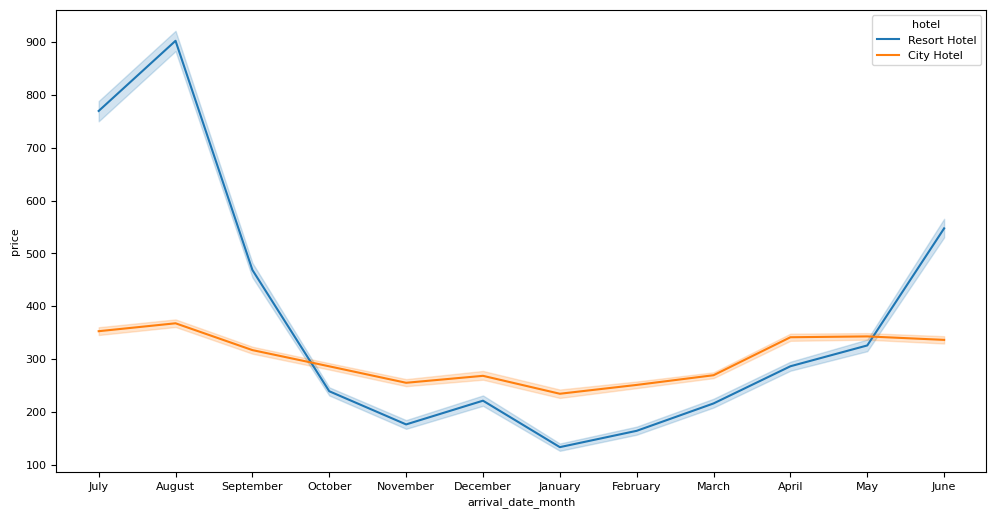

In [ ]:
# Chart - 1 visualization code
# Calculating average monthly rate per person
plt.figure(figsize=(12,6))
df_not_canceled['adr_pp'] = df_not_canceled['adr'] / (df_not_canceled['adults'] + df_not_canceled['children'])
df_not_canceled['price'] = df_not_canceled['adr'] * (df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights'])
sns.lineplot(data = df_not_canceled, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a line plot, generated using the Seaborn library. Here's why this chart was selected:

* **Visualizing Price Trends**: The objective of the code is to visualize the price trends in hotels over different months. A line plot is an effective choice for this purpose as it allows us to observe the change in prices over time, represented by the x-axis (arrival_date_month) and y-axis (price).

* **Comparative Analysis**: By using different colors (hue) to represent the hotel types (resort or city), the line plot enables a comparative analysis of price trends between the two hotel categories. The use of color allows for easy differentiation and understanding of the data.

* **Time-based Analysis**: Line plots are particularly useful for showcasing trends over time. In this case, the x-axis represents the different months, providing a clear temporal dimension to the data. By connecting data points with lines, the plot highlights any patterns or changes in prices across the months.

* **Clear and Concise Presentation**: The line plot presents the information in a visually appealing and easy-to-understand manner. It provides a comprehensive view of how prices vary over time, allowing viewers to quickly grasp the overall trends and any differences between resort and city hotels.

Overall, the line plot is an appropriate choice for visualizing the price trends in hotels over different months and effectively communicates the analysis to the audience.




##### 2. What is/are the insight(s) found from the chart?

By analyzing the line plot, we can identify trends or fluctuations in the average daily rate per person over time. We can observe whether the rates are generally increasing, decreasing, or remaining relatively stable. These insights provide valuable information for hotel management to understand the pricing dynamics, demand patterns, and the potential impact of external factors on the ADR. For example, they can identify peak seasons or periods of high demand and adjust pricing strategies accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Understanding the trends in average daily rate per person over time allows hotels to optimize their pricing strategies and revenue management. By identifying periods of high demand or low occupancy, hotels can adjust rates dynamically to maximize revenue and profitability. Additionally, these insights enable hotels to make data-driven decisions when setting prices, creating promotions, and managing inventory, resulting in increased efficiency, revenue growth, and improved customer satisfaction.

#### Chart - 2

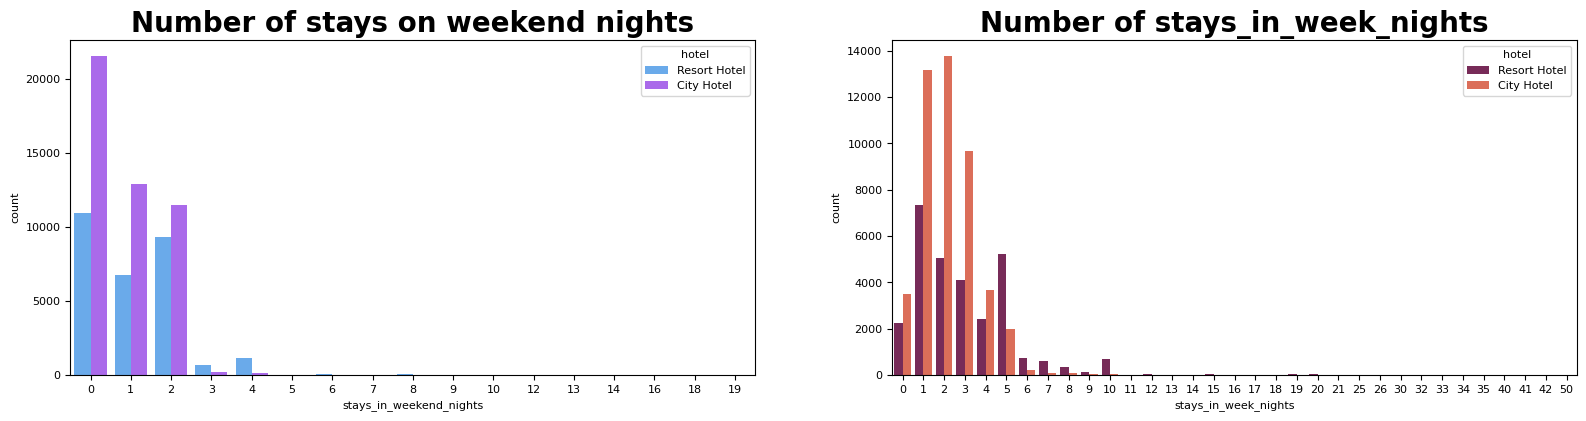

In [ ]:
# Chart - 2 visualization code
# Number of bookings on weekday vs weekends

plt.figure(figsize=(20, 20))
plt.subplot(4, 4, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data= df_not_canceled, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(4, 4, 2)
sns.countplot(data =  df_not_canceled, x = 'stays_in_week_nights', hue='hotel', palette='rocket')
plt.title('Number of stays_in_week_nights',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()


##### 1. Why did you pick the specific chart?

To visualize the comparison between weekend stays and weekday stays, a bar chart can be an appropriate choice. A bar chart allows you to compare the number of stays for each category (weekend and weekday) in a visually straightforward manner.

By using a bar chart, you can easily compare the height of the bars representing the number of weekend stays and weekday stays. This visual comparison helps to identify any significant differences or patterns between the two categories.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart comparing the number of weekend stays vs. weekday stays, the insights that can be derived include:

* Comparison of Volume: The chart visually represents the difference in the number of stays between weekends and weekdays. By comparing the heights of the bars, it is easy to see which category has a higher volume of stays.

* Booking Patterns: The chart helps to understand the booking patterns of guests. If there is a significant difference between weekend stays and weekday stays, it may indicate certain preferences or trends among guests.

* Occupancy Management: The chart can provide insights for hotel managers in terms of managing occupancy. If there are clear differences in the number of stays between weekends and weekdays, it can help with resource allocation, staffing, and revenue management strategies.

* Marketing and Promotions: Understanding the difference in stays between weekends and weekdays can guide marketing and promotional activities. It can help in targeting specific offers or promotions to attract more guests during certain periods or incentivize stays during quieter times.

Overall, the chart allows for a quick comparison between weekend stays and weekday stays, enabling insights into guest booking behavior and potential areas for business optimization.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from comparing weekend stays and weekday stays can indeed help create a positive business impact. Here's how:

* Revenue Optimization: Understanding the difference in stays between weekends and weekdays allows for better revenue management. Hotels can adjust pricing strategies and offers accordingly. For example, they can offer discounted rates or special packages during weekdays to attract more guests and maximize occupancy during quieter periods. This can help optimize revenue and improve overall financial performance.

* Resource Allocation: With insights into booking patterns, hotels can efficiently allocate resources such as staffing, housekeeping, and amenities. If weekends are busier, they can ensure sufficient staff and services are available to provide a positive guest experience. On the other hand, if weekdays have lower occupancy, resources can be scaled down to manage costs effectively.

* Marketing and Promotions: The insights can guide marketing efforts to target specific segments and periods. Hotels can design targeted marketing campaigns to attract more guests during weekends or create appealing weekday packages for business travelers or local residents. By aligning marketing strategies with booking patterns, hotels can improve customer acquisition and drive more bookings.

However, it's important to note that insights may also indicate challenges or negative growth areas:

* Weekend Demand-Supply Imbalance: If the insights reveal a significant difference in demand between weekends and weekdays, it could lead to challenges in managing inventory and pricing. Hotels may face higher competition for weekend stays, potentially leading to rate fluctuations or decreased profitability during weekends.

* Low Weekday Demand: If the insights show consistently low weekday stays, it may indicate challenges in attracting business or leisure travelers during weekdays. Hotels can strategize to address this by offering incentives, partnering with local businesses, or targeting specific markets to stimulate weekday demand.

Overall, the gained insights can be leveraged to create positive business impacts through revenue optimization, resource allocation, and targeted marketing. However, potential negative growth areas may require further analysis and strategic interventions to address specific challenges and maximize overall performance

#### Chart - 3

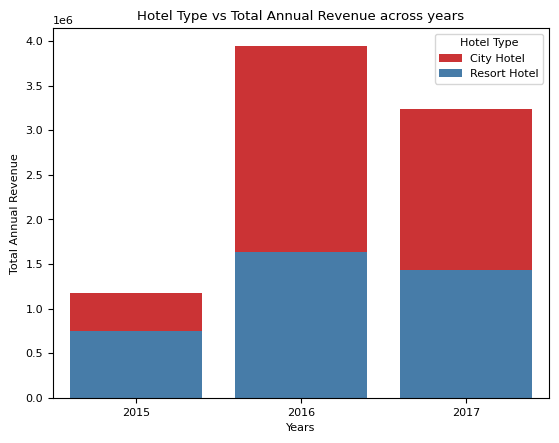

In [ ]:
# Chart - 3 visualization code
#Total revenue across years split by hotel type


# Calculate the total annual revenue by hotel type and year
revenue_data = df.groupby(['arrival_date_year', 'hotel'])['adr'].sum().reset_index()

# Create a bar plot with stacked bars
sns.barplot(data=revenue_data, x='arrival_date_year', y='adr', hue='hotel', palette='Set1', dodge=False)

# Set y-axis label as 'Total Annual Revenue'
plt.ylabel('Total Annual Revenue')

# Set x-axis label as 'Years'
plt.xlabel('Years')

# Set the title of the plot
plt.title('Hotel Type vs Total Annual Revenue across years')

# Show the legend with 'Hotel Type' label
plt.legend(title='Hotel Type')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a bar plot with stacked bars because it effectively displays and compares the total annual revenue of different hotel types across multiple years. The stacked bars allow for easy visual comparison of revenue contributions from each hotel type within each year.

##### 2. What is/are the insight(s) found from the chart?

The chart allows us to observe the total annual revenue generated by each hotel type over the years. We can analyze the revenue trends and identify any significant differences or patterns between the hotel types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the gained insights can help create a positive business impact. By understanding the revenue generated by each hotel type over the years, hotel management can make informed decisions regarding resource allocation, marketing strategies, and overall business planning. It enables them to identify successful revenue-generating periods and focus on optimizing performance.
* Negative growth cannot be directly observed from this chart alone. The chart shows the total annual revenue, which represents the revenue generated by each hotel type in a particular year. To analyze negative growth, a comparison of revenue between different years is required. Additional data and analysis would be needed to determine if there are any periods of negative growth or declining revenue for specific hotel types.

#### Chart - 4

<ipython-input-35-c94829471a13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled['total_nights'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']


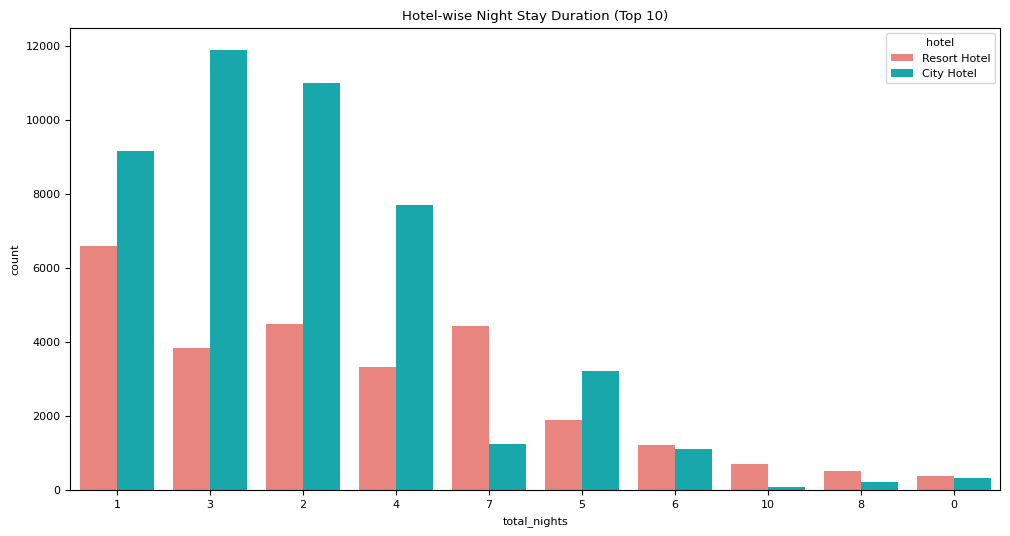

In [ ]:
# Chart - 4 visualization code
#How Long People Stay in the hotel?
# Calculate the total number of nights stayed
df_not_canceled['total_nights'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']

# Define a custom color palette
colors = ['#f8766d', '#00bfc4']  # Custom colors for hotel types

# Create a bar plot for hotel-wise night stay duration (top 10)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel-wise Night Stay Duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order=df_not_canceled['total_nights'].value_counts().iloc[:10].index, ax=ax, palette=colors)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific chart, which is a countplot, because it effectively visualizes the distribution of the number of nights people stay in hotels for each hotel type. The countplot displays the count of occurrences for different categories (in this case, the number of nights stayed) on the x-axis, while the hue parameter represents the hotel type, allowing for easy comparison between the two types of hotels.

By using a countplot, we can quickly identify the most common durations of hotel stays and compare the patterns between different hotel types. This chart is suitable for analyzing the distribution and frequency of night stays, making it helpful in understanding the booking trends and preferences of guests in each hotel type.

Overall, the countplot provides a clear and concise visualization to answer the question of how long people stay in hotels, offering insights into the distribution of night stays across different durations and hotel types.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart can include:

* **Distribution of Stay Duration**: The chart provides a visual representation of the distribution of stay durations for each hotel type. It allows us to identify the most common durations and observe any variations between the two hotel types.

* **Popular Stay Durations**: By examining the tallest bars on the chart, we can determine the most popular stay durations for guests in each hotel type. This insight can be valuable for understanding guest preferences and optimizing hotel operations accordingly.

* **Comparison between Hotel Types**: The chart enables a comparison between the stay durations of different hotel types. It helps identify any notable differences or similarities in guest behavior, such as longer or shorter stays in one type of hotel compared to the other.

* **Outliers or Unusual Stay Durations**: By examining the entire distribution, including the less frequent stay durations, the chart can reveal any outliers or unusual patterns. These insights can be explored further to understand the reasons behind unique guest preferences or specific booking behaviors.

Overall, the chart provides insights into the typical stay durations in each hotel type and allows for comparisons between the two. It helps identify common patterns and potential areas for further analysis or improvement in hotel operations and guest services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can help create a positive business impact. Here's how:

* **Optimal Resource Allocation**: Understanding the most popular stay durations for each hotel type can help optimize resource allocation. Hotels can adjust their staffing levels, room availability, and amenities to align with the typical guest preferences. This can lead to improved operational efficiency and guest satisfaction.

* **Revenue Optimization**: By analyzing the distribution of stay durations, hotels can identify opportunities to maximize revenue. For example, if shorter stays are more common, hotels can focus on increasing occupancy rates and attracting more frequent bookings. Conversely, if longer stays are prevalent, hotels can offer extended stay packages or target guests seeking extended accommodations.

* **Customized Marketing and Services**: Knowing the preferred stay durations of guests in each hotel type enables targeted marketing campaigns and personalized guest experiences. Hotels can tailor their promotions, packages, and services to attract and cater to guests' specific needs, leading to higher customer loyalty and positive reviews.

Regarding negative growth, there may not be any direct insights from the chart that would lead to negative growth. However, it's important to consider outliers or unusual patterns in stay durations. If the chart reveals a significant number of extremely short or long stays that deviate from the norm, it could indicate potential issues such as cancellations, dissatisfaction, or operational challenges. These outliers should be investigated further and addressed to ensure positive growth and guest satisfaction.

#### Chart - 5 - Correlation Heatmap

1.   List item
2.   List item

<ipython-input-36-8fe1f295efbd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


<Axes: >

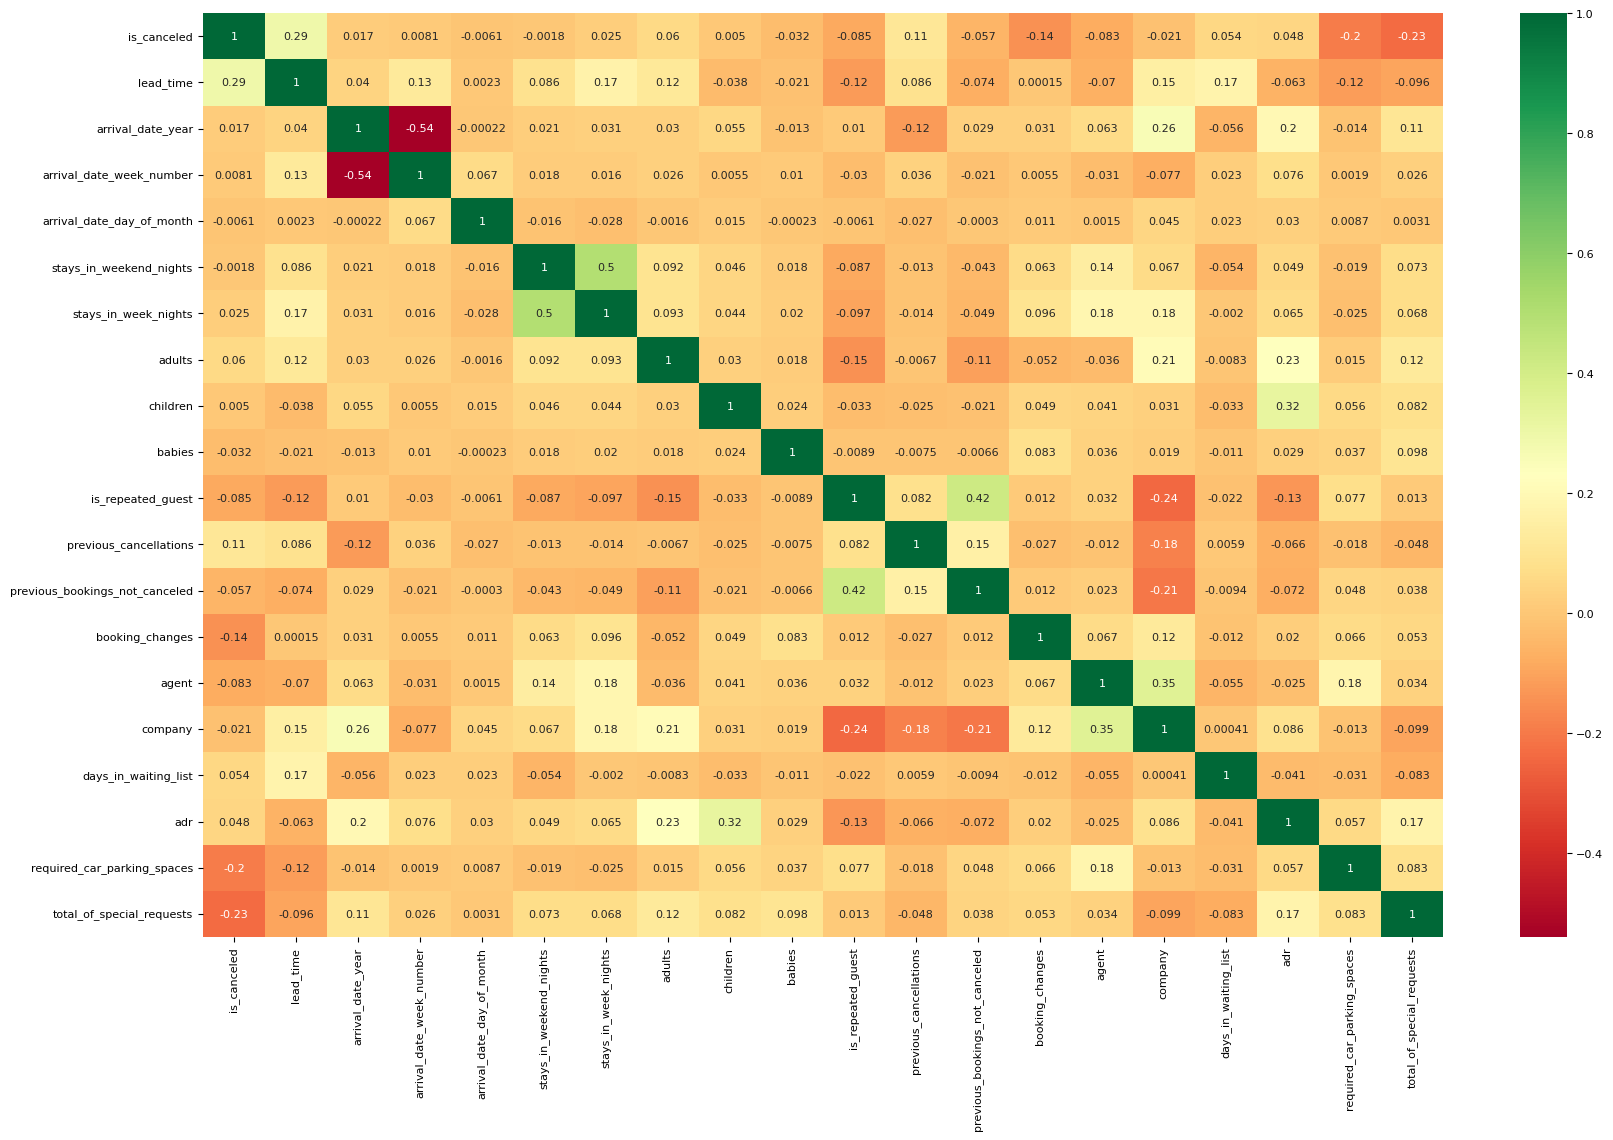

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

##### 1. Why did you pick the specific chart?

I picked a correlation heatmap for this exploratory analysis because it allows us to visualize the pairwise correlations between multiple variables simultaneously. The heatmap provides a clear and intuitive representation of the strength and direction of correlations using color gradients. This makes it easier to identify patterns and relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

The insights you can derive from the correlation heatmap will depend on the specific variables included in the analysis and the patterns observed. Here are a few potential insights you might gain:

* **Strong positive correlation**: If you observe a strong positive correlation between variables like 'customer_age' and 'booking_date', it suggests that older customers tend to book further in advance.

* **Strong negative correlation**: A strong negative correlation between 'total_booking_cost' and 'payment_method' might indicate that certain payment methods are associated with lower booking costs.

* **Weak or no correlation**: If you find weak or no correlation between variables, it suggests that they are likely independent of each other or have nonlinear relationships that are not captured by linear correlation measures.

#### Chart - 6 - Pair Plot

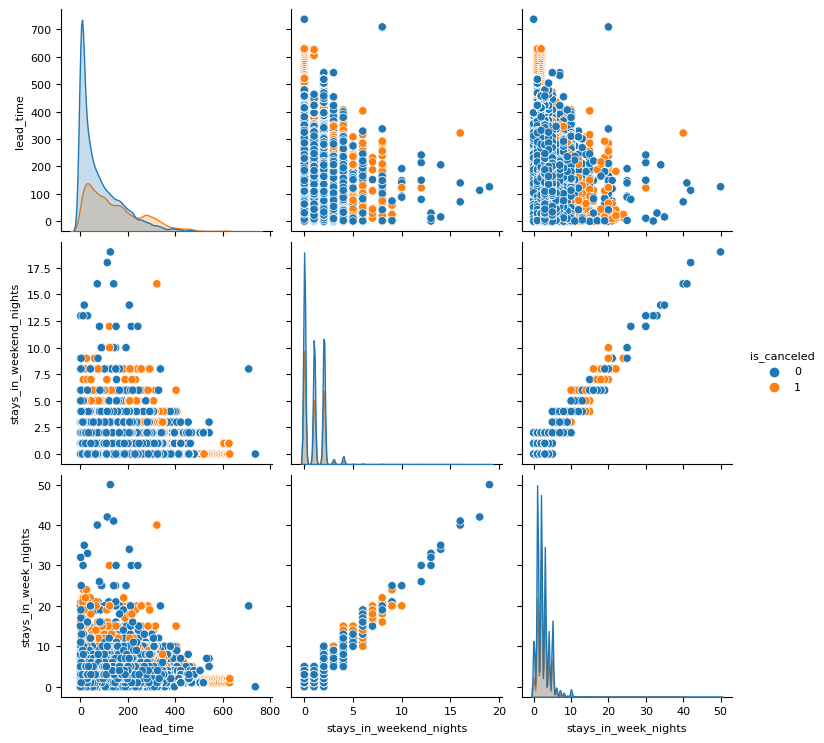

In [ ]:
selected_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']

# Creating a DataFrame with selected columns
df_selected = df[selected_columns]

# Plotting the pair plot
sns.pairplot(df_selected ,hue='is_canceled')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a pairplot for this exploratory analysis because it allows us to visualize the relationships between pairs of variables in a dataset. It creates scatter plots for each numerical variable against every other numerical variable and displays histograms for each variable along the diagonal. This helps in identifying potential patterns, trends, and outliers in the data

##### 2. What is/are the insight(s) found from the chart?

The insights you can derive from the pairplot will depend on the specific variables included in the analysis and the patterns observed. Here are a few potential insights you might gain:

* **Correlations**: You can identify linear relationships between numerical variables by examining the scatter plots. For example, you might find that there is a positive correlation between 'lead_time' (the number of days between booking and arrival) and 'is_canceled' (whether the booking was canceled).

* **Distributions**: The histograms along the diagonal can provide insights into the distributions of individual variables. You can identify if a variable is skewed, bimodal, or normally distributed. This information is valuable for understanding the data characteristics.

* **Outliers**: Scatter plots can reveal outliers or extreme values that deviate significantly from the general trend. Outliers may require further investigation or preprocessing, as they can impact analysis and modeling.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the Hotel Booking EDA conducted, I would suggest the following recommendations to help the client achieve their business objectives:

* **Improve Booking Cancellation Rate**: Analyze the factors contributing to booking cancellations and implement strategies to reduce cancellations. This could include optimizing the booking process, offering flexible cancellation policies, and enhancing communication with guests to understand their needs better.

* **Focus on Marketing and Promotion**: Identify the countries from which most guests come and tailor marketing efforts to target those specific markets. This could involve collaborating with local travel agencies, leveraging social media platforms, and offering promotions or packages that cater to the preferences of guests from those countries.

* **Optimize Revenue Generation**: Continuously monitor and analyze revenue trends across years to identify periods of growth or decline. Based on these insights, implement revenue optimization strategies such as adjusting pricing strategies, optimizing room availability and rates, and offering personalized services or packages to increase revenue.

* **Enhance Guest Experience**: Use the insights gained from the analysis of the length of stay to improve the overall guest experience. This could involve providing personalized services, implementing loyalty programs, offering additional amenities or activities to extend guest stays, and ensuring efficient check-in and check-out processes.

* **Improve Operational Efficiency**: Analyze the distribution of bookings on weekdays and weekends to optimize staffing levels, resource allocation, and service availability. This will help ensure that the hotel is adequately staffed during peak periods and can efficiently manage guest needs and preferences.

* **Monitor Competitor Performance**: Keep track of the performance and offerings of competitors in the hotel industry. This will provide valuable insights into market trends, customer preferences, and potential areas for improvement or differentiation.

* **Collect and Utilize Guest Feedback**: Implement a systematic process to collect guest feedback and reviews to understand their experiences and identify areas for improvement. Utilize this feedback to enhance service quality, address customer concerns, and exceed guest expectations.

By implementing these recommendations, the client can aim to achieve objectives such as reducing booking cancellations, increasing revenue, improving guest satisfaction, and staying competitive in the hotel industry. Regular monitoring, analysis, and adaptation of strategies based on data insights will be essential to drive positive business outcomes.

# **Conclusion**


**In conclusion**, the Hotel Booking EDA conducted on the dataset has provided valuable insights into various aspects of hotel bookings, guest behavior, and revenue generation. The analysis has shed light on important trends, patterns, and factors that can impact the success of the hotel business.

# The key findings from the EDA include:

* **Booking Cancellations**: A significant number of bookings were found to be canceled. This highlights the importance of understanding the reasons behind cancellations and implementing strategies to reduce them.

* **Booking Ratio**: The booking ratio between the Resort Hotel and City Hotel was examined, indicating the preferences of guests for each type of hotel. This information can be used to tailor marketing efforts and allocate resources accordingly.

* **Weekday vs. Weekend Bookings**: The analysis of bookings on weekdays versus weekends revealed insights into the demand patterns during different days of the week. This knowledge can guide operational decisions and resource allocation.

* **Revenue Generation**: The total revenue across years and split by hotel type was analyzed, providing an overview of the revenue trends. This information can help in identifying periods of growth and implementing revenue optimization strategies.

* **Guest Origin**: The country from which most guests come was identified, providing an opportunity to target marketing efforts and tailor services to cater to the needs and preferences of guests from that specific country.

* **Length of Stay**: The analysis of how long people stay in hotels provided insights into guest behavior and can be used to enhance the guest experience, optimize room availability, and improve operational efficiency.

# Based on these findings, several recommendations can be made to achieve the business objectives:

* Focus on reducing booking cancellations through improved communication and flexible policies.

* Target marketing efforts towards countries with a high number of guests.

* Implement revenue optimization strategies based on revenue trends and performance analysis.

* Enhance guest experience through personalized services, loyalty programs, and efficient check-in/check-out processes.

* Optimize operational efficiency based on booking patterns and demand trends.

* Monitor competitor performance and adapt strategies accordingly.

* Collect and utilize guest feedback to continuously improve services.

By implementing these recommendations, the hotel can improve its overall performance, increase revenue, enhance guest satisfaction, and stay competitive in the market.

It is important to note that the success of these recommendations depends on regular monitoring, analysis of data, and adaptation of strategies based on changing market dynamics and guest preferences. By embracing data-driven decision-making and continuous improvement, the hotel can position itself for long-term success in the highly competitive hospitality industry.